In [30]:
!pip install tweepy
!pip install networkx

In [31]:
import tweepy
from pprint import pprint
import json
import networkx as nx
import time
import matplotlib.pyplot as plt
import pymongo

In [32]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

db = client["SMM"]
followers_coll = db["followers"]
friends_coll = db["friends"]
friend_friend_coll = db["friend_friend"]

In [33]:
consumer_key = "a3viE9zsnehj18AS37qvyGtls"
consumer_secret = "L07cOhvQuNt4W20R3AeSFuXmCiVdcyLfiFbeYlV7gq4m97unz7"
access_token = "724311312-Ynce64galfx3EBK3BMKirvkMhHtYxmImeEIbd0nG"
access_token_secret = "PVOdxleUDq9sfviPACiLydvTMAO8Esjf3PK37OlEk80mA"

In [34]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information

In [35]:
api = tweepy.API(auth) 
graph=nx.DiGraph()

In [36]:
def limit_handler(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.TweepError:
            print("Error")
            time.sleep(60 * 15)
            continue
        except StopIteration:
            break

In [38]:
print("Loading followers of me into a List")
followers = []

Loading followers of me into a List


In [45]:
for follower in limit_handler(tweepy.Cursor(api.followers,id="netflix").items(1000)):
    followers_coll.insert_one(dict(follower._json))

In [29]:
pprint(dict(followers[0]._json))

IndexError: list index out of range

In [46]:
print("Loading people I follow into a list")
friends = []
for friend in limit_handler(tweepy.Cursor(api.friends,id="netflix").items(500)):
    friends_coll.insert_one(dict(friend._json))

Loading people I follow into a list


## Trying to load data location wise

In [37]:
followers = []
friends = []

In [38]:
curr_user = dict(api.get_user("netflix")._json)

In [39]:
for follower in followers_coll.find():
    followers.append(follower)

for friend in friends_coll.find():
    friends.append(friend)

In [40]:
def filterUsers(user):
    if user["location"] and user["location"] != None and len(user["location"]) and user["followers_count"]>50:
        return True
    else:
        return False

In [41]:
filtered_followers = filter(filterUsers,followers)
filtered_friends = filter(filterUsers,friends)

In [ ]:
foll_loc = []
for foll in filtered_followers:
    if foll_loc is None:
        foll_loc.append(foll["location"])
    else:
        if

In [42]:
print "Adding followers relationships..."
for user in filtered_followers:
	graph.add_edge(user["screen_name"],curr_user["screen_name"])

Adding followers relationships...


In [43]:
print "Adding following relationships..."
for user in filtered_friends:
	graph.add_edge(curr_user["screen_name"],user["screen_name"])

Adding following relationships...


In [44]:
def filterFriends(user):
    if user["followers_count"] > 100000 and user["verified"] == True:
        return True
    else:
        return False

In [46]:
for x in filter(filterFriends,filtered_friends):
    print(x["screen_name"])

justsanaa
WeeMissBea
ochocinco
ChristinaMilian
LilNasX
nickjonas
Kandi
witchernetflix
MariahCarey
BenSPLATT
kateesackhoff
tylerhoechlin
Bethenny
Sarah_Hyland
caitrionambalfe
glaad
youngchopbeatz
RobMSheehan
DUALIPA
DevonESawa
lizzo
charli_xcx
Jordan_Fisher
yashar
lauramarano
Jaime_King
BreneBrown
TherealTaraji
elijahdaniel
JimCameron
smashleybell
KaceyMusgraves
GeorgeTakei
ReignOfApril
brokeymcpoverty
AOC
Adaripp
Kathbum
DarrenCriss
cher
asabfb
Charlie_Carver
julieplec
RonanFarrow
MingNa
nbcthegoodplace
jk_rowling
colinodonoghue1
TATIANNANOW
EricMcCormack
taylornation13
lukebenward
HayleyKiyoko
ArianaGrande
_richardmadden
nlyonne
LaurenJauregui
KatGraham
MsSarahPaulson
NyleDiMarco
druidDUDE
IncredibleCulk
Aimee_Garcia
tomellis17
shondarhimes
AlishaBoe
RossButler
jvn
antoni
billyeichner
_AlexHirsch
alfonsocuaron
imchriskelly
byshondaland
YNB
NXOnNetflix
sabrinanetflix
Essence
Racheldoesstuff
VancityReynolds
PennBadgley
AnnaKendrick47
MatthewACherry
seewhatsnext
rgay
iSmashFizzle
Fred_De

In [25]:
for friend_friend in limit_handler(tweepy.Cursor(api.friends,id="nickjonas").items()):
    if friend_friend._json["followers_count"]>100 and friend_friend._json["followers_count"]<2000:
            print("Friend_Friend: ",friend_friend._json["screen_name"])

Error


KeyboardInterrupt: 

In [ ]:
for friend in filter(filterFriends,filtered_friends):
    if friend_friend_coll.find({'friend': friend }).count()>0:
        continue
    else:
        for friend_friend in limit_handler(tweepy.Cursor(api.friends,id=friend["screen_name"]).items()):
            if friend_friend._json["followers_count"]>100 and friend_friend._json["followers_count"]<2000:
                friend_friend_coll.insert_one({
                    "friend":friend,
                    "friend_friend":dict(friend_friend._json)
                })

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error


In [ ]:
for follower in filtered_followers:
    for friend in filtered_friends:
        if friend["screen_name"] in limit_handler(tweepy.Cursor(api.friends_ids,id=follower["screen_name"]).items()):
            db["followerfriends"].insert_one({"follower":follower["screen_name"],"friend":friend["screen_name"]})
            print(follower["screen_name"],friend["screen_name"])
            

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error


In [100]:
len(filtered_followers)

88

In [112]:
api.show_friendship(source_screen_name='amazon', target_screen_name='arnavc')

(Friendship(_api=<tweepy.api.API object at 0x1170474d0>, followed_by=True, screen_name=u'amazon', blocked_by=None, all_replies=None, muting=None, live_following=False, notifications_enabled=None, _json={u'notifications_enabled': None, u'screen_name': u'amazon', u'blocked_by': None, u'all_replies': None, u'muting': None, u'followed_by': True, u'live_following': False, u'blocking': None, u'can_dm': True, u'marked_spam': None, u'id_str': u'20793816', u'following': False, u'want_retweets': None, u'following_requested': None, u'id': 20793816, u'following_received': None}, id=20793816, can_dm=True, marked_spam=None, id_str=u'20793816', following=False, want_retweets=None, following_received=None, blocking=None, following_requested=None), Friendship(_api=<tweepy.api.API object at 0x1170474d0>, screen_name=u'arnavc', followed_by=False, _json={u'screen_name': u'arnavc', u'followed_by': False, u'id_str': u'15082992', u'following': True, u'following_requested': None, u'id': 15082992, u'following_

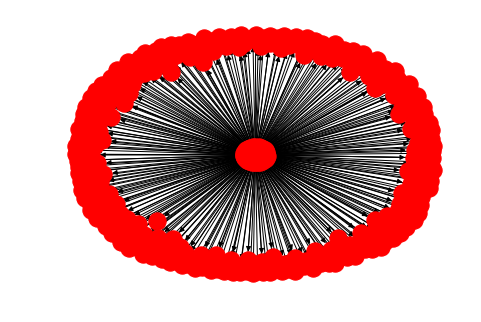

In [101]:
nx.draw(graph)

In [75]:
plt.savefig("path.png")

<Figure size 432x288 with 0 Axes>

In [37]:
len(graph)

101

In [26]:
graph.number_of_nodes()

443

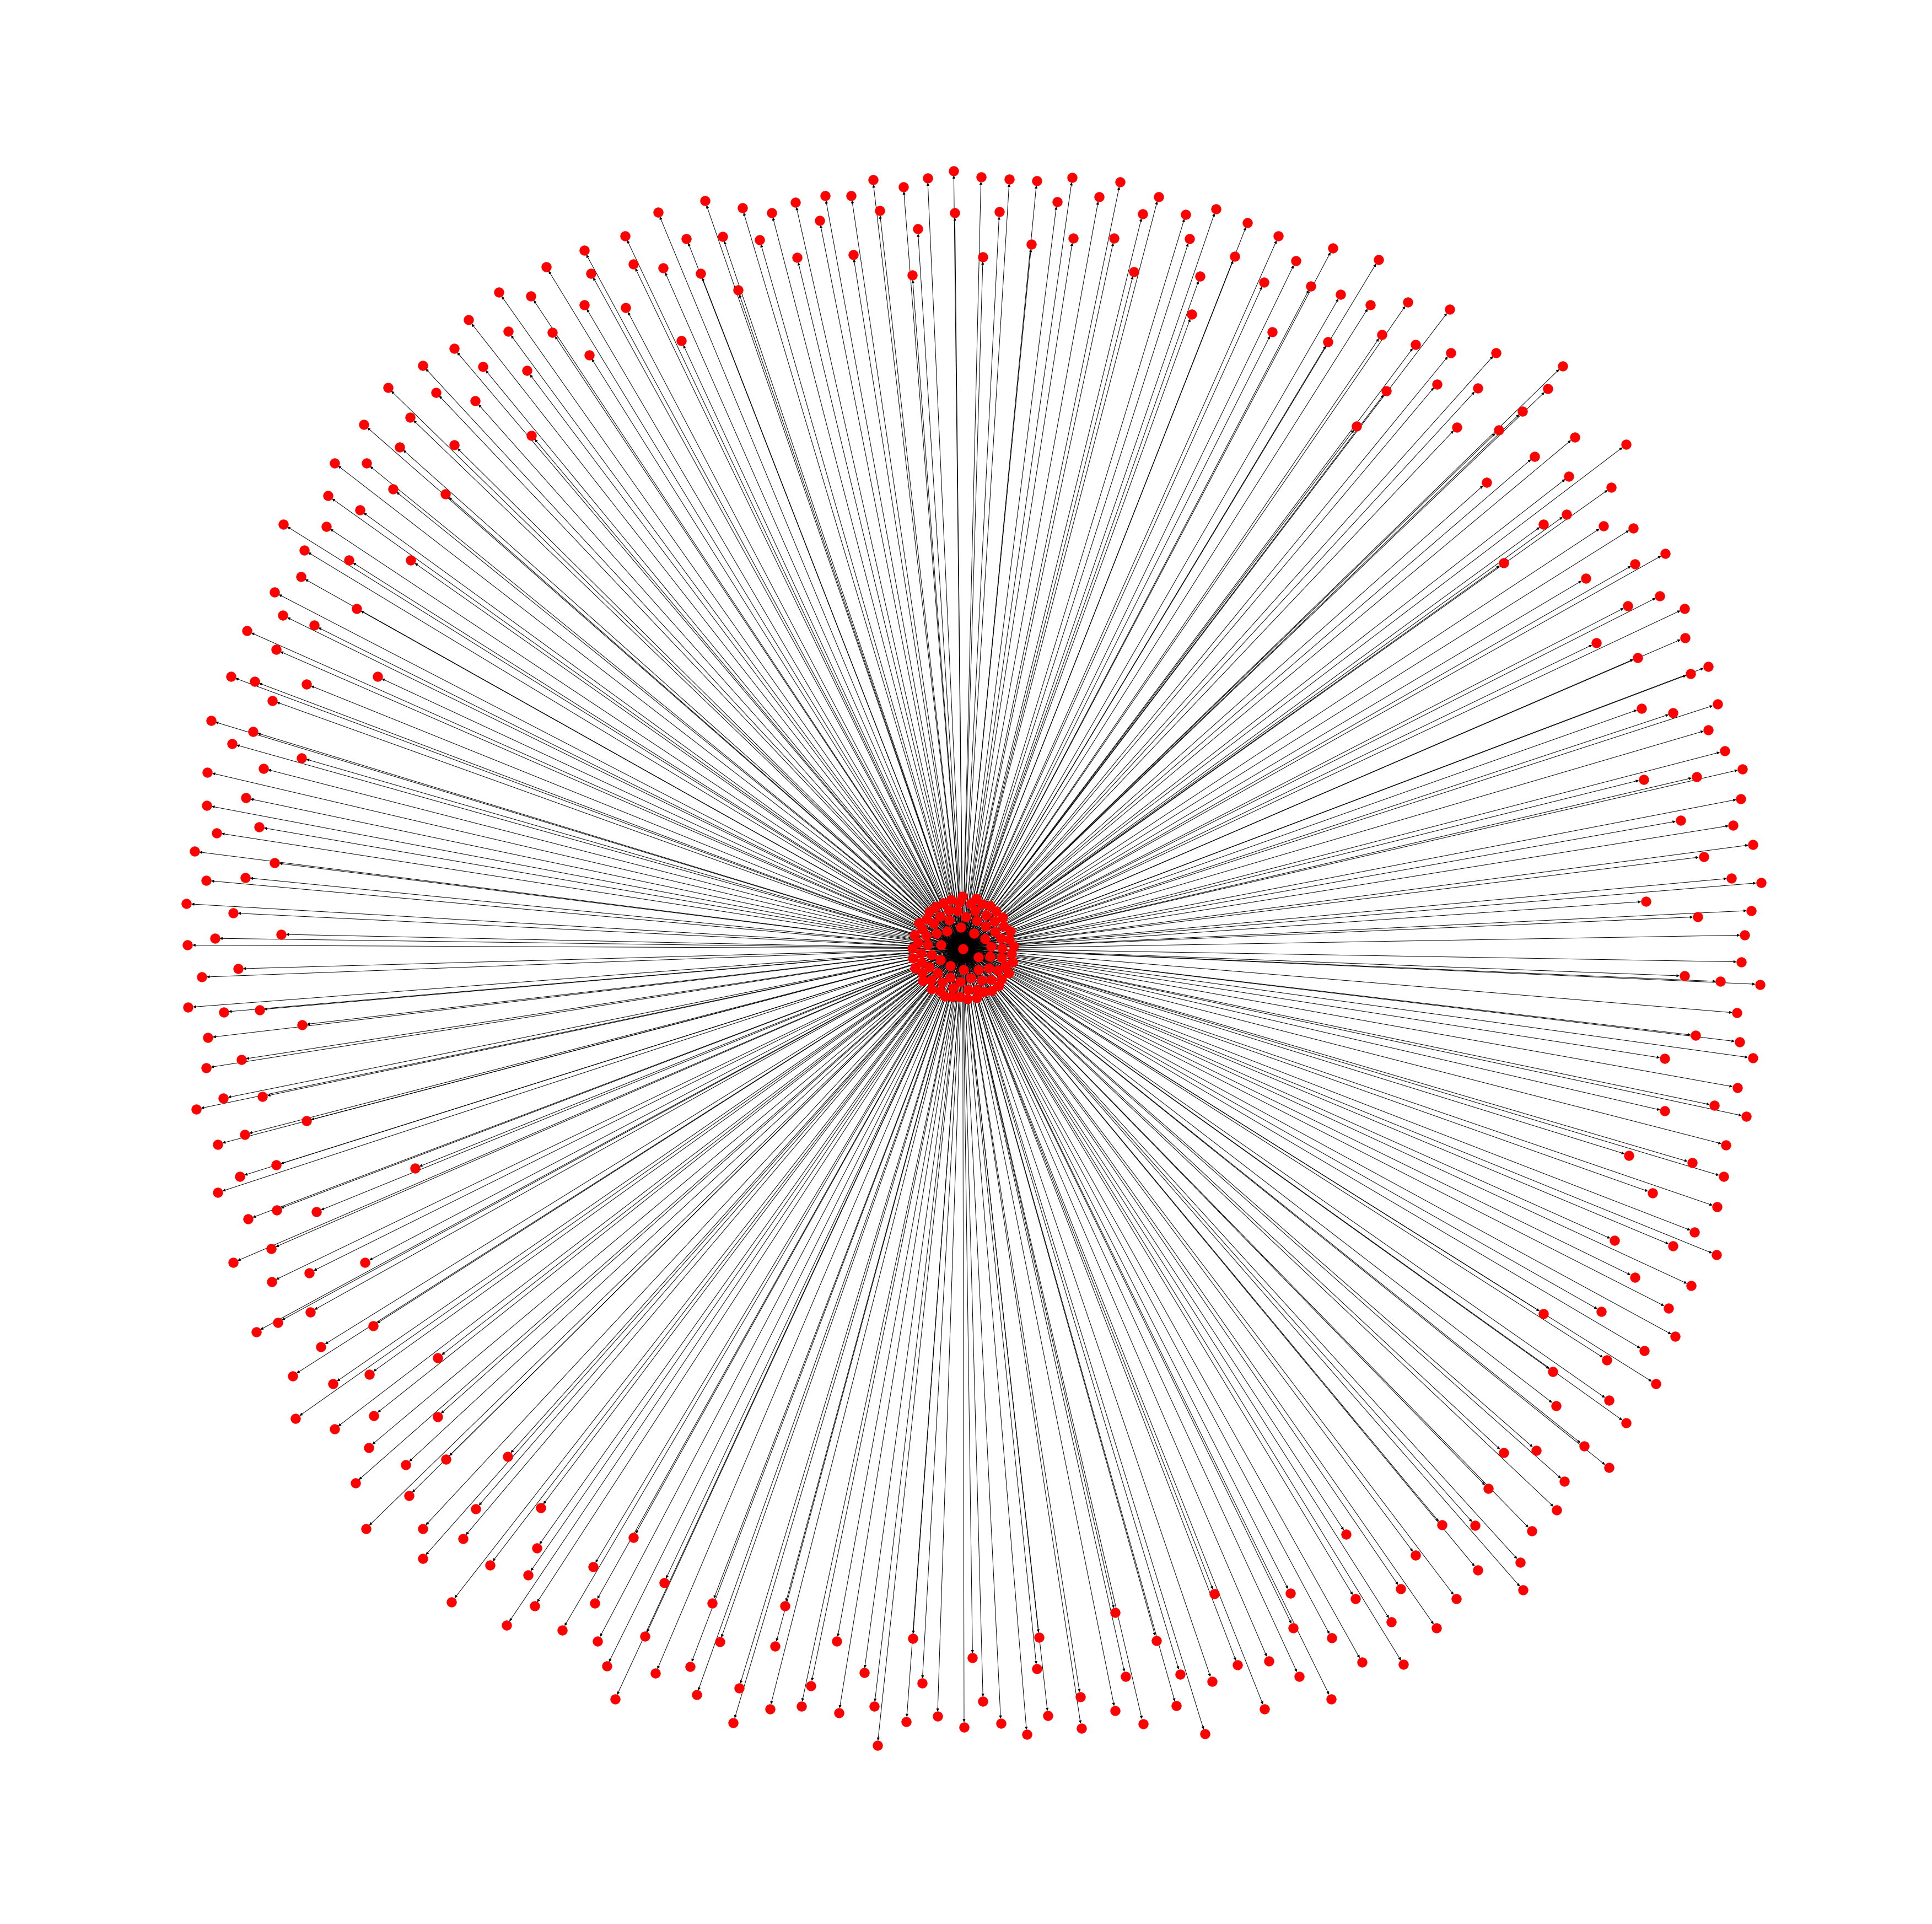

In [134]:
plt.figure(3,figsize=(48,48))
nx.draw(graph)